# Variance in data
Get data per day, group by day and calculate variance

In [1]:
import torch as th
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils_pixel import *
import pandas as pd

/dccstor/cimf/drought_impact/drought/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load data sample
# Get its date
# add to a dict {date, value}

In [ ]:
split_path = f'/dccstor/cimf/drought_impact/pixel_based/pixel_data/filtered/{split}/'
with open(split_path+'cloud_free_samples.pkl', 'rb') as f:
    cloud_free_samples = pickle.load(f)

In [2]:
def get_vals_per_day(split, sample_type, exp, tot_samples):
    
    ndvi_per_day = dict()
    
    metadata_path = f'pixel_data/nofilter/{split}/'
    all_loc_dates_files = sorted([f for f in os.listdir(metadata_path) if f.startswith('all_loc_dates')])
    all_loc_dates = []
    
    if 'filtered' in exp:
        split_path = f'/dccstor/cimf/drought_impact/pixel_based/pixel_data/filtered/{split}/'
        with open(split_path+'cloud_free_samples.pkl', 'rb') as f:
            cloud_free_samples = pickle.load(f)

    for f in all_loc_dates_files:
        with open(metadata_path+f, 'rb') as f :
            all_loc_dates += pickle.load(f)
    n_rep = tot_samples/len(all_loc_dates)
    
    data_path =  f'pixel_data/{exp}/{split}/'
    for sample in os.listdir(data_path+'x/'):
        sample_nbr = int(sample.split('_')[-1].split('.')[0])
        if 'filtered' in exp:
            filtered_idx = int(np.floor(cloud_free_samples[sample_nbr]/n_rep))
            dates = all_loc_dates[filtered_idx][1] + all_loc_dates[filtered_idx][3][:1]
        else:
            sample_idx = int(np.floor(sample_nbr/n_rep))
            dates = all_loc_dates[sample_idx][1] + all_loc_dates[sample_idx][3][:1]
        
                 
        # Get NDVI 
        img = th.load(data_path+'x/'+sample)
        label = th.load(data_path+'y/'+sample)
        ndvi = th.cat([img[:, :, 15, :, :].squeeze(1).squeeze(1), label[:, :1, 15, :, :]], axis=1)
        
        for timestep in range(ndvi.size(1)):
            ndvi_time = ndvi[:,timestep,:,:].squeeze(1).squeeze(1)
            date = dates[timestep]
            
            if date in ndvi_per_day:
                ndvi_per_day[date].append(ndvi_time[0].numpy())
            else:
                ndvi_per_day[date] = [ndvi_time[0].numpy()]
        
        
    return ndvi_per_day

In [3]:
split = 'test'
sample_type = 'pixel_data'
exp = 'nofilter' #'filtered_clean' # 
tot_samples = 4000

ndvi_per_day_test = get_vals_per_day(split, sample_type, exp, tot_samples)
ndvi_test_std = pd.DataFrame.from_dict(ndvi_per_day_test, orient='index').sort_index().std(axis=1).reset_index()
ndvi_test_mean = pd.DataFrame.from_dict(ndvi_per_day_test, orient='index').sort_index().mean(axis=1).reset_index()

In [4]:
split = 'val'
sample_type = 'pixel_data'
exp = 'nofilter' #'filtered_clean' # 
tot_samples = 4000

ndvi_per_day_val = get_vals_per_day(split, sample_type, exp, tot_samples)
ndvi_val_std = pd.DataFrame.from_dict(ndvi_per_day_val, orient='index').sort_index().std(axis=1).reset_index()
ndvi_val_mean = pd.DataFrame.from_dict(ndvi_per_day_val, orient='index').sort_index().mean(axis=1).reset_index()

In [5]:
split = 'train'
sample_type = 'pixel_data'
exp = 'nofilter' #'filtered_clean' # 
tot_samples = 40000

ndvi_per_day_train = get_vals_per_day(split, sample_type, exp, tot_samples)
ndvi_train_std = pd.DataFrame.from_dict(ndvi_per_day_train, orient='index').sort_index().std(axis=1).reset_index()
ndvi_train_mean = pd.DataFrame.from_dict(ndvi_per_day_train, orient='index').sort_index().mean(axis=1).reset_index()

In [6]:
split = 'test_vaud'
sample_type = 'pixel_data'
exp =  'nofilter' #'filtered_clean' #
tot_samples = 6000

ndvi_per_day_testvaud = get_vals_per_day(split, sample_type, exp, tot_samples)
ndvi_testvaud_std = pd.DataFrame.from_dict(ndvi_per_day_testvaud, orient='index').sort_index().std(axis=1).reset_index()
ndvi_testvaud_mean = pd.DataFrame.from_dict(ndvi_per_day_testvaud, orient='index').sort_index().mean(axis=1).reset_index()

In [7]:
split = 'test_valais'
sample_type = 'pixel_data'
exp =  'nofilter' #'filtered_clean' #
tot_samples = 4000

ndvi_per_day_testval = get_vals_per_day(split, sample_type, exp, tot_samples)
ndvi_testval_std = pd.DataFrame.from_dict(ndvi_per_day_testval, orient='index').sort_index().std(axis=1).reset_index()
ndvi_testval_mean = pd.DataFrame.from_dict(ndvi_per_day_testval, orient='index').sort_index().mean(axis=1).reset_index()

### Filtered

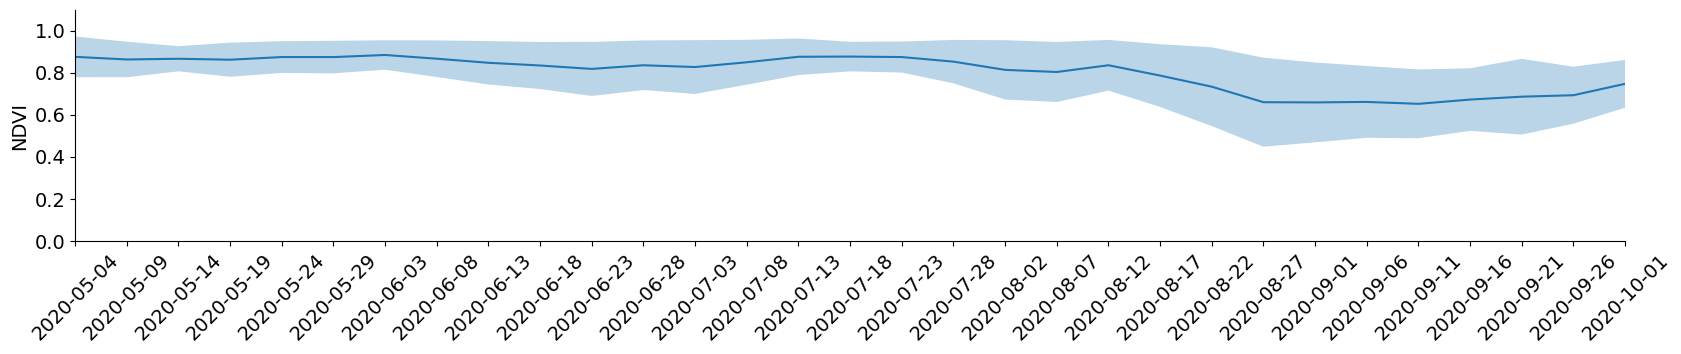

In [48]:
# Plot the mean and variance across time

fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean test set')
sns.lineplot(ax=ax, y=ndvi_test_mean[0], x='index', data=ndvi_test_mean)
plt.fill_between(y1=ndvi_test_mean[0]+ndvi_test_std[0],y2=ndvi_test_mean[0]-ndvi_test_std[0], x=ndvi_test_std['index'], alpha=0.3)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_test_mean[ndvi_test_mean["index"]=='2020-10-01'].index[0])
sns.despine(top=True, right=True)
plt.show()

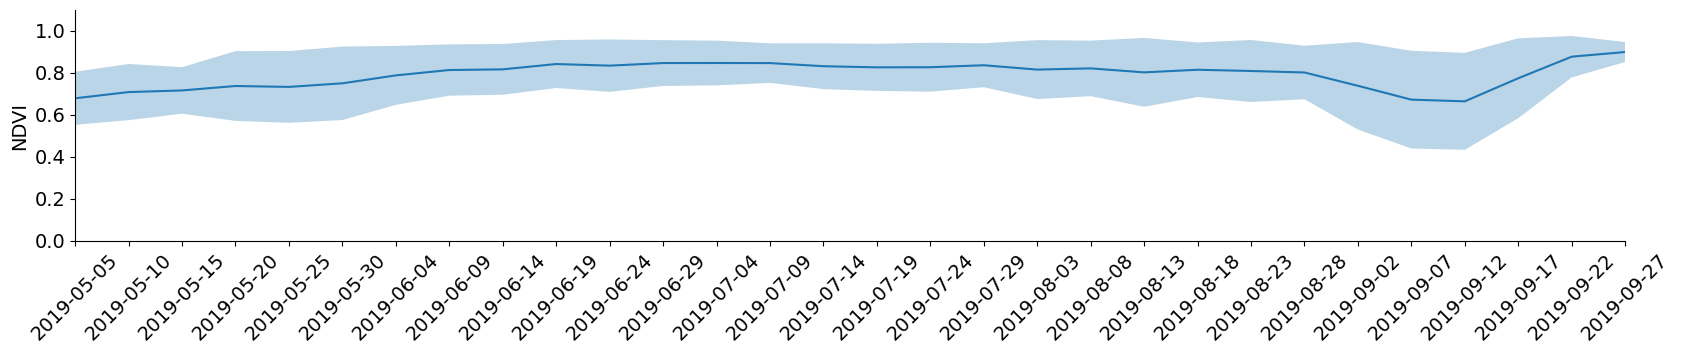

In [47]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_val_mean[0], x='index', data=ndvi_val_mean)
plt.fill_between(y1=ndvi_val_mean[0]+ndvi_val_std[0],y2=ndvi_val_mean[0]-ndvi_val_std[0], x=ndvi_val_std['index'], alpha=0.3)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_val_mean[ndvi_val_mean["index"]=='2019-09-27'].index[0])
sns.despine(top=True, right=True)
plt.show()

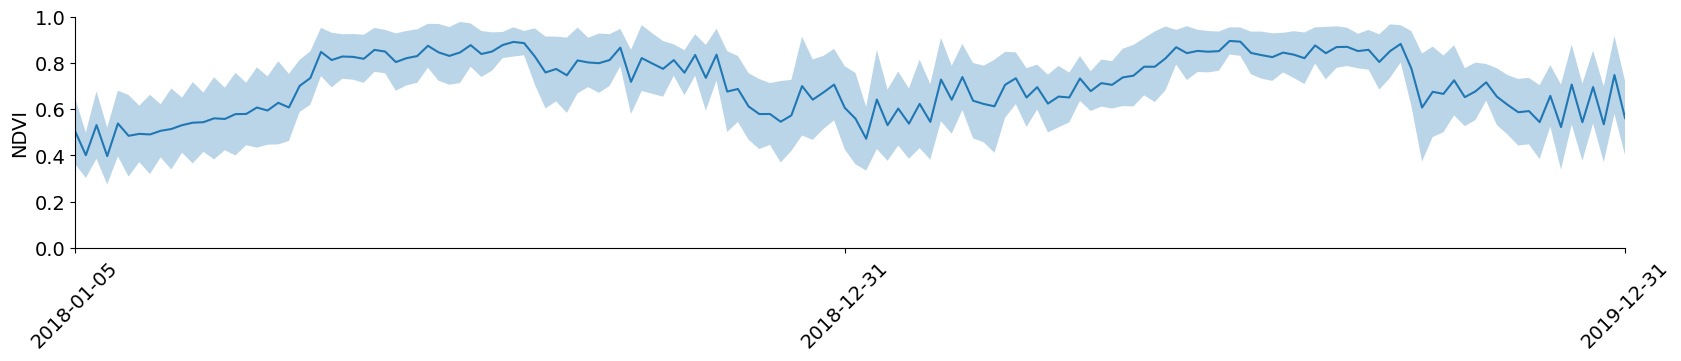

In [46]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean train set')
sns.lineplot(ax=ax, y=ndvi_train_mean[0], x='index', data=ndvi_train_mean)
plt.fill_between(y1=ndvi_train_mean[0]+ndvi_train_std[0],y2=ndvi_train_mean[0]-ndvi_train_std[0], x=ndvi_train_std['index'], alpha=0.3)
# Specify the tick locations and labels for the x-axis
plt.xticks([ndvi_train_mean[ndvi_train_mean["index"]=='2018-01-05'].index[0], ndvi_train_mean[ndvi_train_mean["index"]=='2018-12-31'].index[0], ndvi_train_mean[ndvi_train_mean["index"]=='2019-12-31'].index[0]], 
           ['2018-01-05', '2018-12-31', '2019-12-31'], rotation=45, size=14)
#plt.xticks(rotation=45)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1)
plt.xlim(0,ndvi_train_mean[ndvi_train_mean["index"]=='2019-12-31'].index[0])
sns.despine(top=True, right=True)
plt.show()

In [23]:
ndvi_train_std[0].mean()

0.1310331545887036

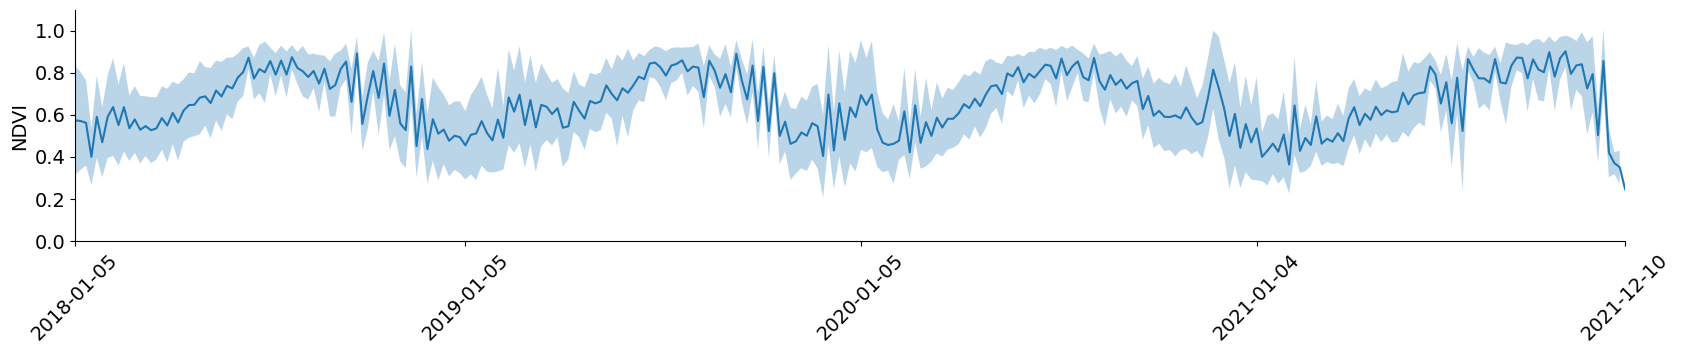

In [45]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_testval_mean[0], x='index', data=ndvi_testval_mean)
plt.fill_between(y1=ndvi_testval_mean[0]+ndvi_testval_std[0],y2=ndvi_testval_mean[0]-ndvi_testval_std[0], x=ndvi_testval_std['index'], alpha=0.3)
plt.xticks([ndvi_testval_mean[ndvi_testval_mean["index"]=='2018-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2019-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2020-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-01-04'].index[0],ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-12-10'].index[0]], 
           ['2018-01-05', '2019-01-05', '2020-01-05','2021-01-04', '2021-12-10'], rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-12-10'].index[0])
sns.despine(top=True, right=True)
plt.show()

In [34]:
ndvi_testvaud_mean#[ndvi_testvaud_mean["index"]=='2021-01-07']

,index,0
0,2018-01-20,0.530817
1,2018-01-25,0.535780
2,2018-01-30,0.529346
3,2018-02-04,0.441944
4,2018-02-09,0.530260
...,...,...
190,2020-08-27,0.772350
191,2020-09-01,0.752226
192,2020-09-06,0.784854
193,2020-09-11,0.720207


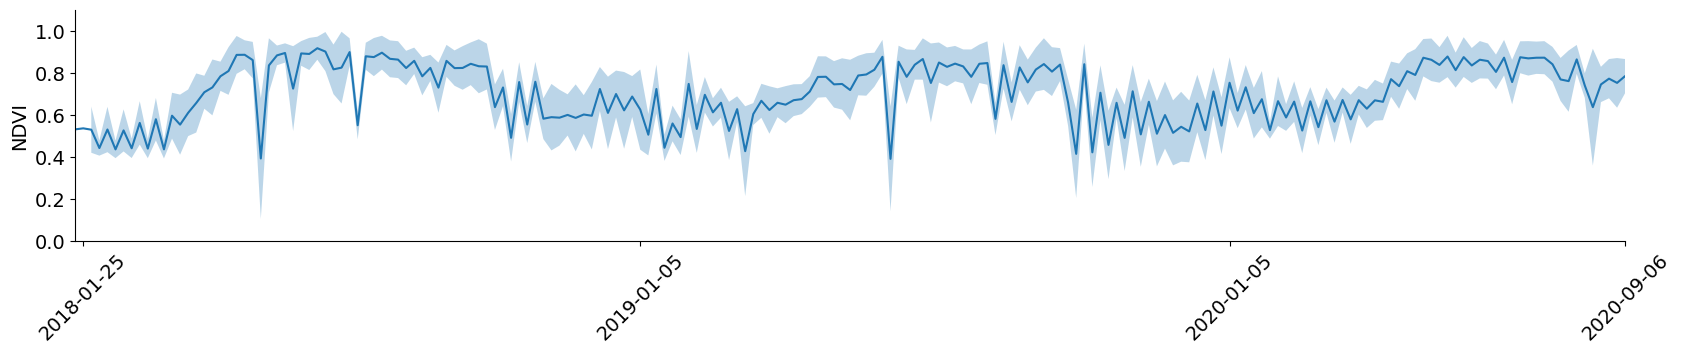

In [44]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_testvaud_mean[0], x='index', data=ndvi_testvaud_mean)
plt.fill_between(y1=ndvi_testvaud_mean[0]+ndvi_testvaud_std[0],y2=ndvi_testvaud_mean[0]-ndvi_testvaud_std[0], x=ndvi_testvaud_std['index'], alpha=0.3)
plt.xticks([ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2018-01-25'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2019-01-05'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2020-01-05'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2020-09-06'].index[0]], 
           ['2018-01-25', '2019-01-05', '2020-01-05', '2020-09-06'], rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2020-09-06'].index[0])
sns.despine(top=True, right=True)
plt.show()

### Nofilter

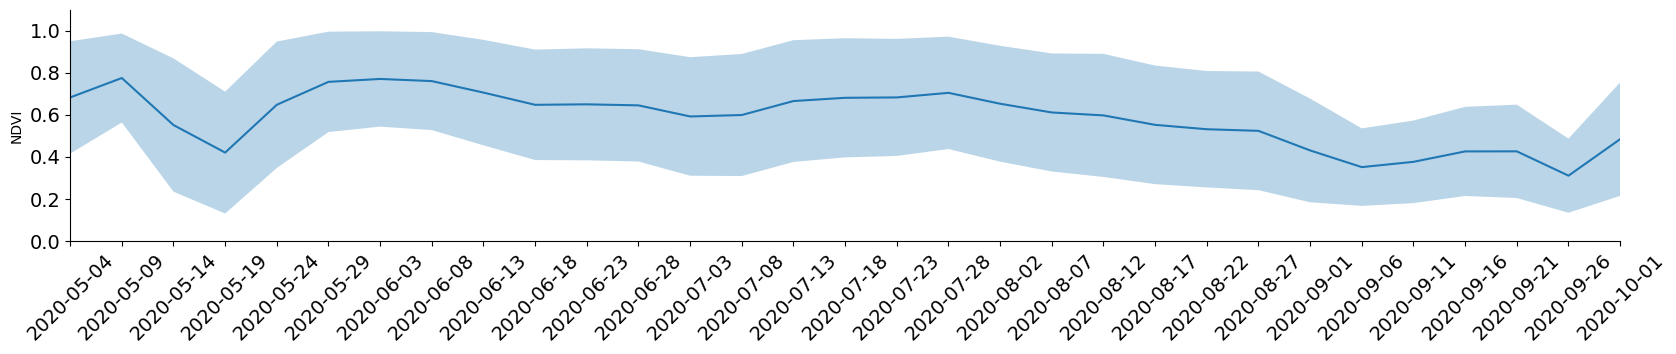

In [55]:
# Plot the mean and variance across time

fig, ax = plt.subplots(1,1,figsize=(20,3))
sns.lineplot(ax=ax, y=ndvi_test_mean[0], x='index', data=ndvi_test_mean)
plt.fill_between(y1=ndvi_test_mean[0]+ndvi_test_std[0],y2=ndvi_test_mean[0]-ndvi_test_std[0], x=ndvi_test_std['index'], alpha=0.3)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI')
plt.ylim(0,1.1)
plt.xlim(0,ndvi_test_mean[ndvi_test_mean["index"]=='2020-10-01'].index[0])
sns.despine(top=True, right=True)
plt.show()

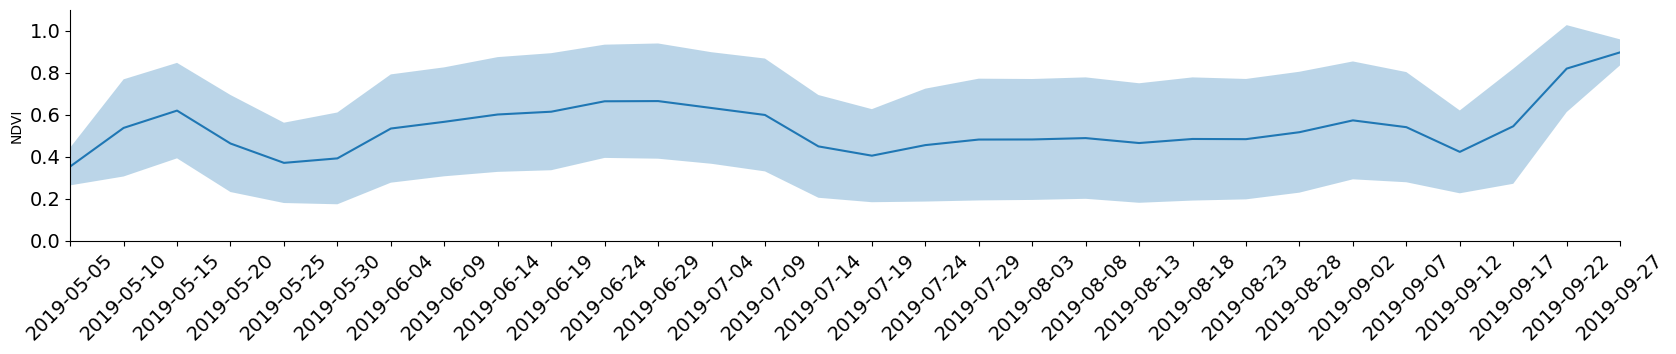

In [56]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_val_mean[0], x='index', data=ndvi_val_mean)
plt.fill_between(y1=ndvi_val_mean[0]+ndvi_val_std[0],y2=ndvi_val_mean[0]-ndvi_val_std[0], x=ndvi_val_std['index'], alpha=0.3)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI')
plt.ylim(0,1.1)
plt.xlim(0,ndvi_val_mean[ndvi_val_mean["index"]=='2019-09-27'].index[0])
sns.despine(top=True, right=True)
plt.show()

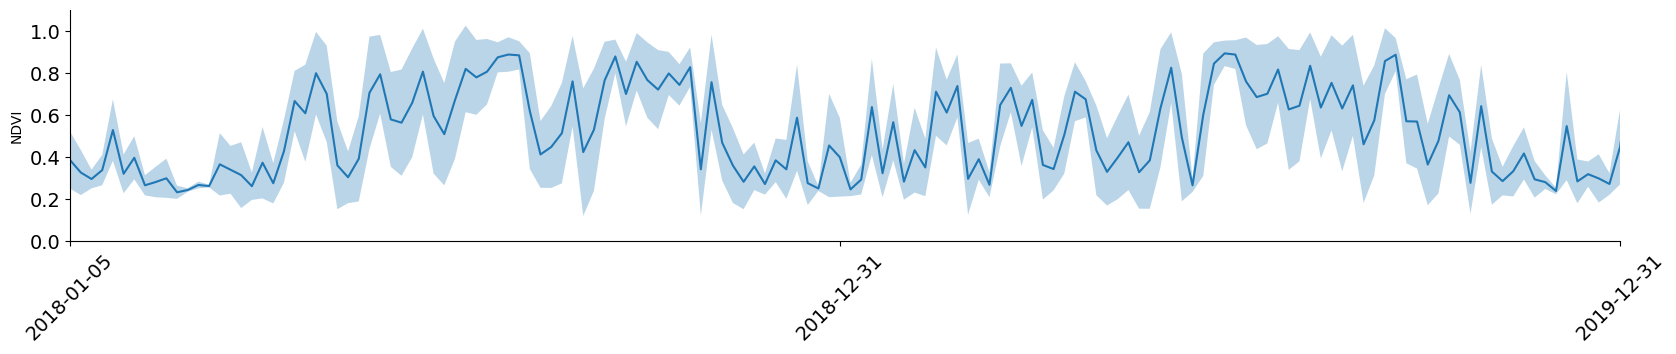

In [57]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean train set')
sns.lineplot(ax=ax, y=ndvi_train_mean[0], x='index', data=ndvi_train_mean)
plt.fill_between(y1=ndvi_train_mean[0]+ndvi_train_std[0],y2=ndvi_train_mean[0]-ndvi_train_std[0], x=ndvi_train_std['index'], alpha=0.3)
plt.xticks([ndvi_train_mean[ndvi_train_mean["index"]=='2018-01-05'].index[0], ndvi_train_mean[ndvi_train_mean["index"]=='2018-12-31'].index[0], ndvi_train_mean[ndvi_train_mean["index"]=='2019-12-31'].index[0]], 
           ['2018-01-05', '2018-12-31', '2019-12-31'], rotation=45, size=14)
#plt.xticks(rotation=45)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI')
plt.ylim(0,1.1)
plt.xlim(0,ndvi_train_mean[ndvi_train_mean["index"]=='2019-12-31'].index[0])
sns.despine(top=True, right=True)
plt.show()

In [58]:
ndvi_train_std[0].mean()

0.15964235113428032

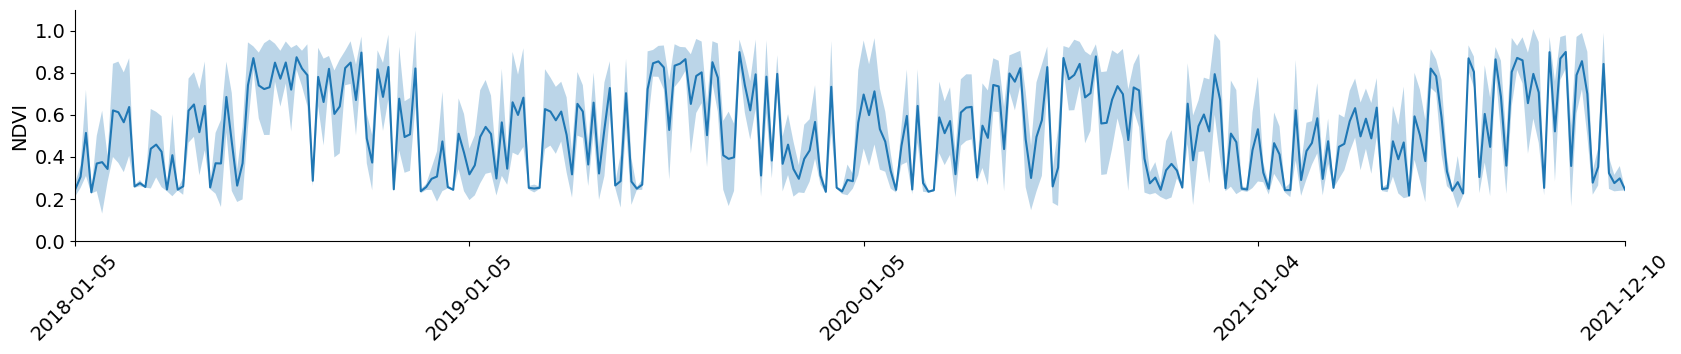

In [59]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_testval_mean[0], x='index', data=ndvi_testval_mean)
plt.fill_between(y1=ndvi_testval_mean[0]+ndvi_testval_std[0],y2=ndvi_testval_mean[0]-ndvi_testval_std[0], x=ndvi_testval_std['index'], alpha=0.3)
plt.xticks([ndvi_testval_mean[ndvi_testval_mean["index"]=='2018-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2019-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2020-01-05'].index[0], ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-01-04'].index[0],ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-12-10'].index[0]], 
           ['2018-01-05', '2019-01-05', '2020-01-05','2021-01-04', '2021-12-10'], rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_testval_mean[ndvi_testval_mean["index"]=='2021-12-10'].index[0])
sns.despine(top=True, right=True)
plt.show()

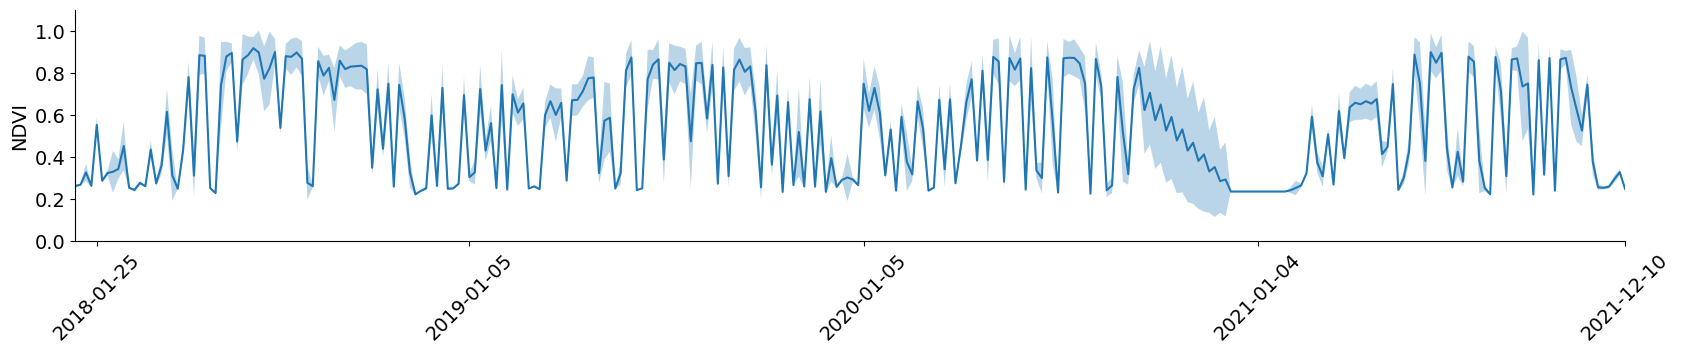

In [60]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
#plt.title('NDVI mean val set')
sns.lineplot(ax=ax, y=ndvi_testvaud_mean[0], x='index', data=ndvi_testvaud_mean)
plt.fill_between(y1=ndvi_testvaud_mean[0]+ndvi_testvaud_std[0],y2=ndvi_testvaud_mean[0]-ndvi_testvaud_std[0], x=ndvi_testvaud_std['index'], alpha=0.3)
plt.xticks([ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2018-01-25'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2019-01-05'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2020-01-05'].index[0], ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2021-01-04'].index[0],ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2021-12-10'].index[0]], 
           ['2018-01-25', '2019-01-05', '2020-01-05','2021-01-04', '2021-12-10'], rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel('')
plt.ylabel('NDVI', size=14)
plt.ylim(0,1.1)
plt.xlim(0,ndvi_testvaud_mean[ndvi_testvaud_mean["index"]=='2021-12-10'].index[0])
sns.despine(top=True, right=True)
plt.show()

# Variance in time 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Concatenate different timeseries 

def get_samples(split, sample_type, exp, tot_samples):
    
    all_timeseries = list()
    all_timesteps = list()
    
    metadata_path = f'pixel_data/nofilter/{split}/'
    all_loc_dates_files = sorted([f for f in os.listdir(metadata_path) if f.startswith('all_loc_dates')])
    all_loc_dates = []
    
    if 'filtered' in exp:
        split_path = f'/dccstor/cimf/drought_impact/pixel_based/pixel_data/filtered/{split}/'
        with open(split_path+'cloud_free_samples.pkl', 'rb') as f:
            cloud_free_samples = pickle.load(f)

    for f in all_loc_dates_files:
        with open(metadata_path+f, 'rb') as f :
            all_loc_dates += pickle.load(f)
    n_rep = tot_samples/len(all_loc_dates)
    
    data_path =  f'pixel_data/{exp}/{split}/'
    for sample in os.listdir(data_path+'x/'):
        sample_nbr = int(sample.split('_')[-1].split('.')[0])
        if 'filtered' in exp:
            filtered_idx = int(np.floor(cloud_free_samples[sample_nbr]/n_rep))
            dates = all_loc_dates[filtered_idx][1] + all_loc_dates[filtered_idx][3][:1]
        else:
            sample_idx = int(np.floor(sample_nbr/n_rep))
            dates = all_loc_dates[sample_idx][1] + all_loc_dates[sample_idx][3][:1]
        
                 
        # Get NDVI 
        img = th.load(data_path+'x/'+sample)
        label = th.load(data_path+'y/'+sample)
        ndvi = th.cat([img[:, :, 15, :, :].squeeze(1).squeeze(1), label[:, :1, 15, :, :]], axis=1).squeeze(0).squeeze(1).squeeze(1).numpy().tolist()
        
        all_timeseries += ndvi
        all_timesteps += dates

        
    return all_timeseries, all_timesteps

In [4]:
split = 'test'
sample_type = 'pixel_data'
exp = 'filtered_clean' # 
tot_samples = 4000
test_timeseries, test_timesteps= get_samples(split, sample_type, exp, tot_samples)


split = 'val'
sample_type = 'pixel_data'
exp = 'filtered_clean' # 
tot_samples = 4000
val_timeseries, val_timesteps= get_samples(split, sample_type, exp, tot_samples)


split = 'train'
sample_type = 'pixel_data'
exp = 'filtered_clean' # 
tot_samples = 40000
tr_timeseries, tr_timesteps= get_samples(split, sample_type, exp, tot_samples)


split = 'test_vaud'
sample_type = 'pixel_data'
exp = 'filtered_clean' # 
tot_samples = 6000
vaud_timeseries, vaud_timesteps= get_samples(split, sample_type, exp, tot_samples)


split = 'test_valais'
sample_type = 'pixel_data'
exp = 'filtered_clean' # 
tot_samples = 4000
valais_timeseries, valais_timesteps= get_samples(split, sample_type, exp, tot_samples)

In [5]:
df_test = pd.DataFrame({'ndvi':test_timeseries})
df_val = pd.DataFrame({'ndvi':val_timeseries})
df_tr = pd.DataFrame({'ndvi':tr_timeseries})
df_vaud = pd.DataFrame({'ndvi':vaud_timeseries})
df_valais = pd.DataFrame({'ndvi':valais_timeseries})

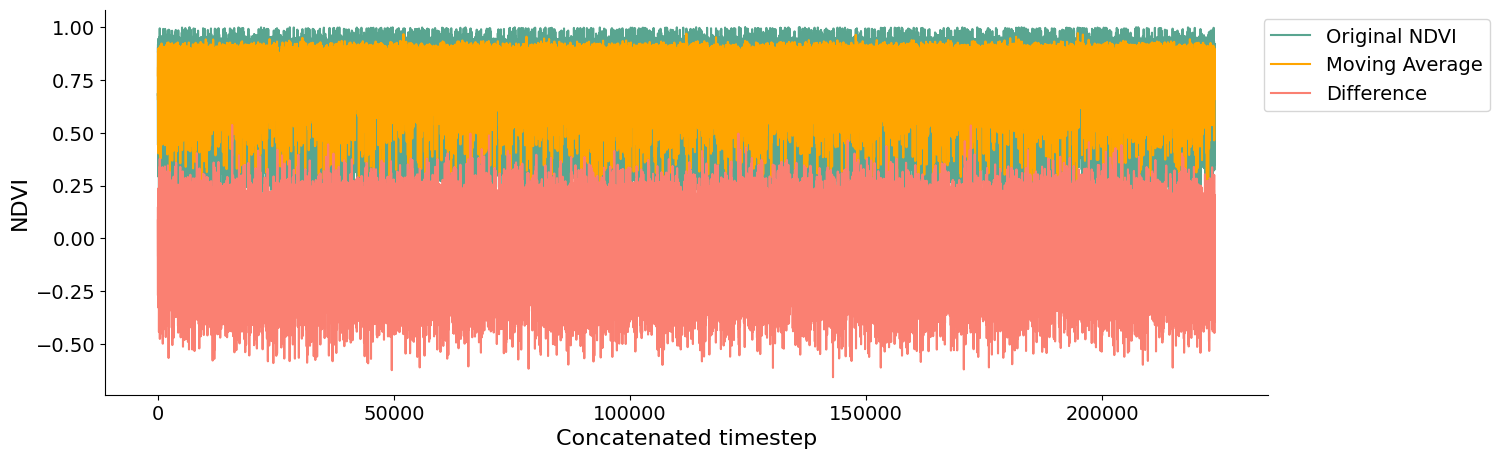

In [6]:
# Define the window size for the moving average

df = df_tr
window_size = 9

# Compute the moving average of the NDVI time series
moving_average = df.rolling(window=window_size, center=True).mean()

# Compute the difference between the original NDVI time series and the moving average
ndvi_diff = df - moving_average

# Plot the original NDVI time series, the moving average, and the difference
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df, x=df.index, y='ndvi', label='Original NDVI', color=sns.color_palette("crest")[1])
sns.lineplot(data=moving_average, x=df.index, y='ndvi', label='Moving Average', color='orange')
sns.lineplot(data=ndvi_diff, x=df.index, y='ndvi', label='Difference', color=sns.color_palette("dark:salmon_r")[0]) #sns.color_palette("mako")[4])
plt.legend(bbox_to_anchor=(1.2,1), fontsize=14)
sns.despine(top=True, right=True)
plt.ylabel('NDVI', size=16)
plt.xlabel('Concatenated timestep', size=16)
ax.tick_params(axis='both', labelsize=14)
plt.show()

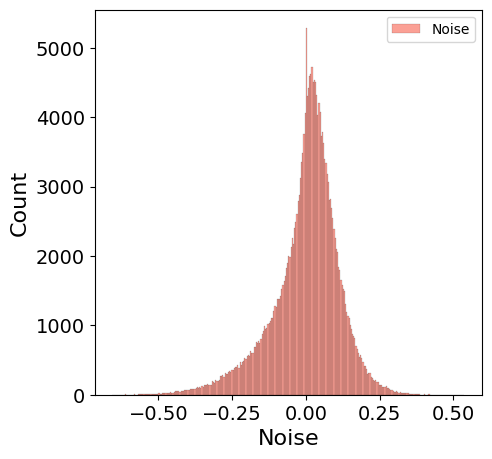

In [7]:
# Histogram of noise: is it Gaussian?

fig, ax = plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=ndvi_diff, x="ndvi", color=sns.color_palette("dark:salmon_r")[0], label='Noise')
ax.tick_params(axis='both', labelsize=14)
plt.xlabel('Noise', size=16)
plt.ylabel('Count', size=16)
plt.legend()
plt.show()

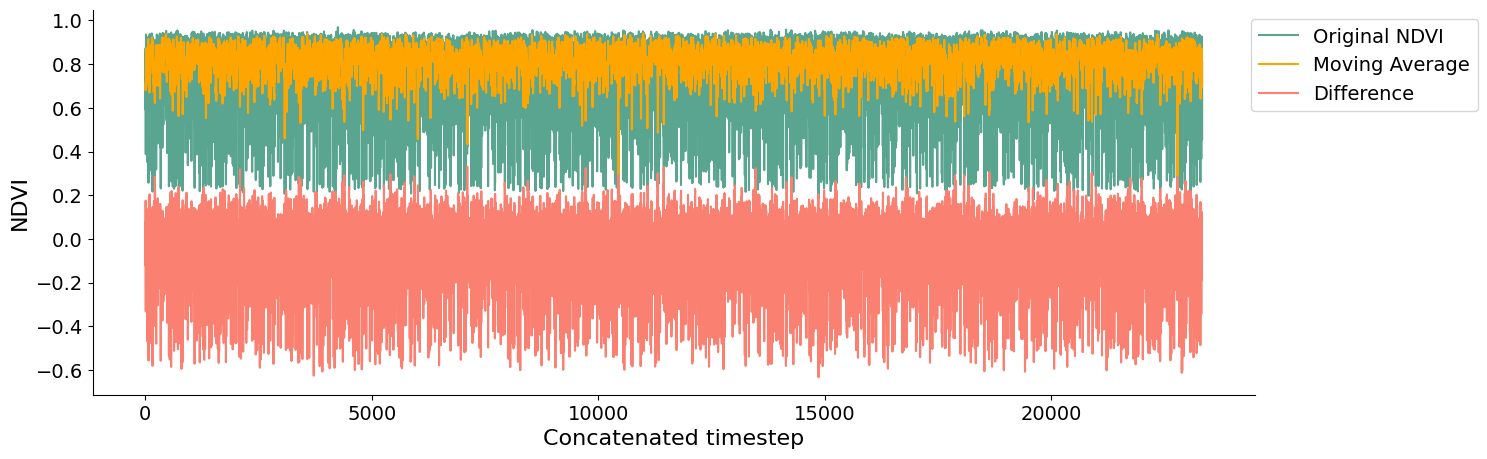

In [6]:
# Define the window size for the moving average

df = df_val
window_size = 9

# Compute the moving average of the NDVI time series
moving_average = df.rolling(window=window_size, center=True).mean()

# Compute the difference between the original NDVI time series and the moving average
ndvi_diff = df - moving_average

# Plot the original NDVI time series, the moving average, and the difference
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df, x=df.index, y='ndvi', label='Original NDVI', color=sns.color_palette("crest")[1])
sns.lineplot(data=moving_average, x=df.index, y='ndvi', label='Moving Average', color='orange')
sns.lineplot(data=ndvi_diff, x=df.index, y='ndvi', label='Difference', color=sns.color_palette("dark:salmon_r")[0]) #sns.color_palette("mako")[4])
plt.legend(bbox_to_anchor=(1.2,1), fontsize=14)
sns.despine(top=True, right=True)
plt.ylabel('NDVI', size=16)
plt.xlabel('Concatenated timestep', size=16)
ax.tick_params(axis='both', labelsize=14)
plt.show()

In [7]:
ndvi_diff.median()

ndvi    0.023581
dtype: float64

In [8]:
ndvi_diff.mean()

ndvi    0.000003
dtype: float64

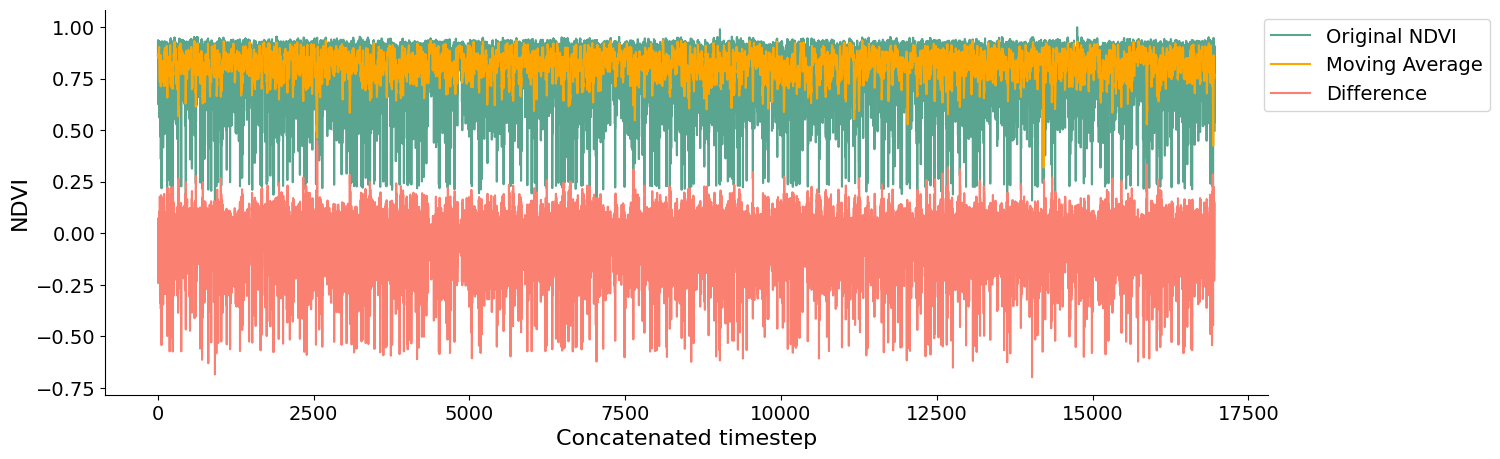

In [24]:
# Define the window size for the moving average

df = df_test
window_size = 10

# Compute the moving average of the NDVI time series
moving_average = df.rolling(window=window_size, center=True).mean()

# Compute the difference between the original NDVI time series and the moving average
ndvi_diff = df - moving_average

# Plot the original NDVI time series, the moving average, and the difference
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df, x=df.index, y='ndvi', label='Original NDVI', color=sns.color_palette("crest")[1])
sns.lineplot(data=moving_average, x=df.index, y='ndvi', label='Moving Average', color='orange')
sns.lineplot(data=ndvi_diff, x=df.index, y='ndvi', label='Difference', color=sns.color_palette("dark:salmon_r")[0]) #sns.color_palette("mako")[4])
plt.legend(bbox_to_anchor=(1.2,1), fontsize=14)
sns.despine(top=True, right=True)
plt.ylabel('NDVI', size=16)
plt.xlabel('Concatenated timestep', size=16)
ax.tick_params(axis='both', labelsize=14)
plt.show()

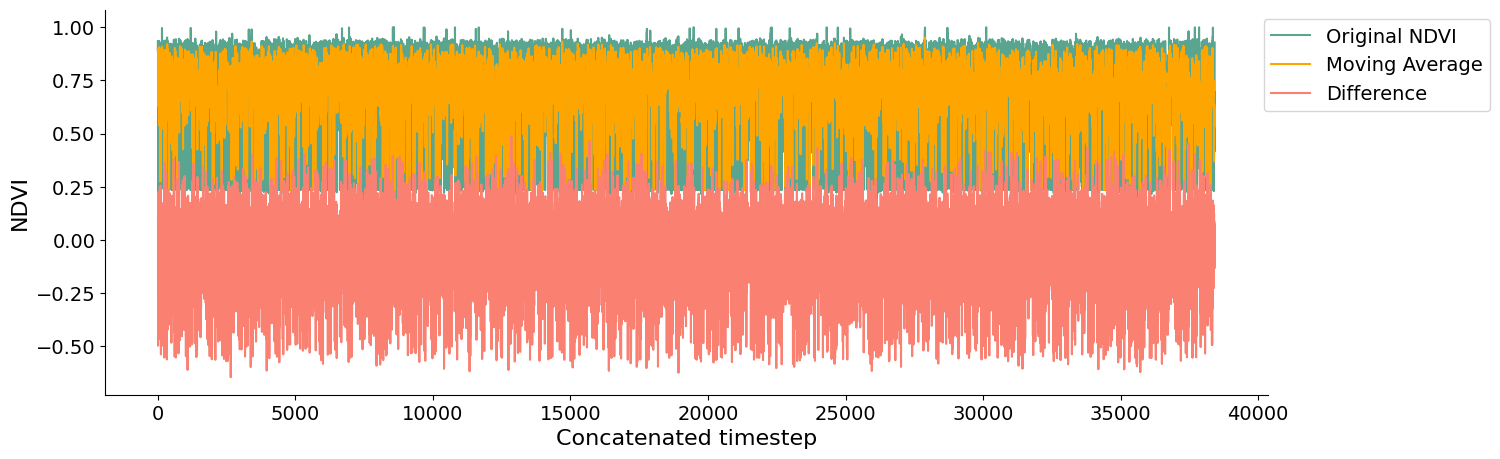

In [119]:
# Define the window size for the moving average

df = df_vaud
window_size = 10

# Compute the moving average of the NDVI time series
moving_average = df.rolling(window=window_size, center=True).mean()

# Compute the difference between the original NDVI time series and the moving average
ndvi_diff = df - moving_average

# Plot the original NDVI time series, the moving average, and the difference
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df, x=df.index, y='ndvi', label='Original NDVI', color=sns.color_palette("crest")[1])
sns.lineplot(data=moving_average, x=df.index, y='ndvi', label='Moving Average', color='orange')
sns.lineplot(data=ndvi_diff, x=df.index, y='ndvi', label='Difference', color=sns.color_palette("dark:salmon_r")[0]) #sns.color_palette("mako")[4])
plt.legend(bbox_to_anchor=(1.2,1), fontsize=14)
sns.despine(top=True, right=True)
plt.ylabel('NDVI', size=16)
plt.xlabel('Concatenated timestep', size=16)
ax.tick_params(axis='both', labelsize=14)
plt.show()

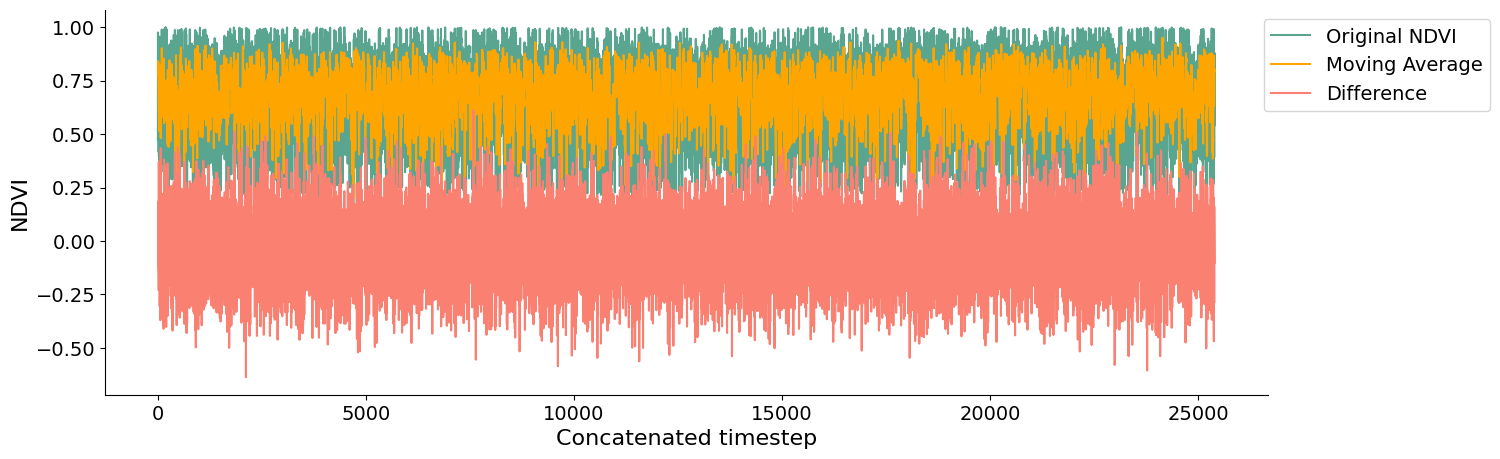

In [120]:
# Define the window size for the moving average

df = df_valais
window_size = 10

# Compute the moving average of the NDVI time series
moving_average = df.rolling(window=window_size, center=True).mean()

# Compute the difference between the original NDVI time series and the moving average
ndvi_diff = df - moving_average

# Plot the original NDVI time series, the moving average, and the difference
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df, x=df.index, y='ndvi', label='Original NDVI', color=sns.color_palette("crest")[1])
sns.lineplot(data=moving_average, x=df.index, y='ndvi', label='Moving Average', color='orange')
sns.lineplot(data=ndvi_diff, x=df.index, y='ndvi', label='Difference', color=sns.color_palette("dark:salmon_r")[0]) #sns.color_palette("mako")[4])
plt.legend(bbox_to_anchor=(1.2,1), fontsize=14)
sns.despine(top=True, right=True)
plt.ylabel('NDVI', size=16)
plt.xlabel('Concatenated timestep', size=16)
ax.tick_params(axis='both', labelsize=14)
plt.show()

# Barcharts to compare model perf

In [14]:
val_loss = [0.0431, 0.0380, 0.0251, 0.0258, 0.0837, 0.0493, 0.0236]
model_name = ['LSTM 5 features + raw data', 'LSTM 5 features + cleaned data', 'LSTM all (83) features + hyperparam tuning', 'LSTM feature selection']
baselines = ['Persistance baseline', 'Mean baseline', 'Median noise']
val_loss = [np.sqrt(x) for x in val_loss[:-1]] + [0.0236]

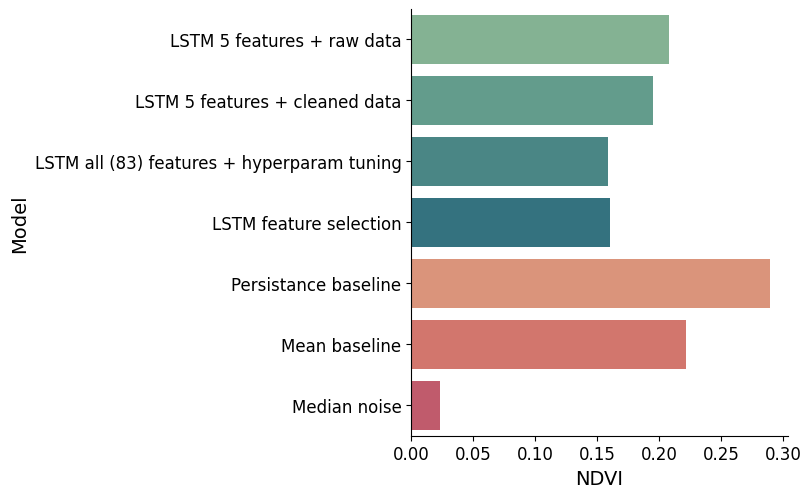

In [15]:
data = pd.DataFrame({'Model': model_name + baselines,
                     'Val Loss': val_loss})

fig = sns.catplot(x='Val Loss', y='Model', kind='bar', data=data, palette=sns.color_palette('crest')[:4] + sns.color_palette('flare')[:3], aspect=1.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('Average deviation from \nlabels for validation set (magnitude)', size=14)
plt.xlabel('NDVI', size=14)
plt.ylabel('Model', size=14)
#ax.tick_params(axis='both', which='major', labelsize=12)

sns.despine(top=True, right=True)
plt.show()

# other tests

In [ ]:
from scipy import signal

In [ ]:
ndvi_data = pd.melt(ndvi_test, id_vars=['index'], var_name='pix', value_name='ndvi')
idx_drop = ndvi_data[ndvi_data.ndvi == None].index
ndvi_data = ndvi_data.dropna(axis=0)

In [ ]:
ndvi_test = pd.DataFrame.from_dict(ndvi_per_day_test, orient='index').sort_index().reset_index()

In [ ]:
# Perform wavelet decomposition
widths = np.arange(1, len(ndvi_data)+1)
cwt_coeffs = signal.cwt(ndvi_data.ndvi, signal.ricker, widths)

In [ ]:
# Find threshold value for noise removal
sigma = np.median(np.abs(cwt_coeffs)) / 0.6745
threshold = sigma * np.sqrt(2*np.log(len(ndvi_data)))

In [ ]:
# Remove noise
cwt_coeffs = (np.multiply(cwt_coeffs, np.abs(cwt_coeffs) > threshold))
ndvi_filt = signal.icwt(cwt_coeffs, signal.ricker, widths)

In [ ]:
# Visualize original and filtered NDVI time series
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(ndvi_data)
axs[0].set_ylabel('Original NDVI')
axs[1].plot(ndvi_filt)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Filtered NDVI')
plt.show()

# Checking phase shift in rolling mean

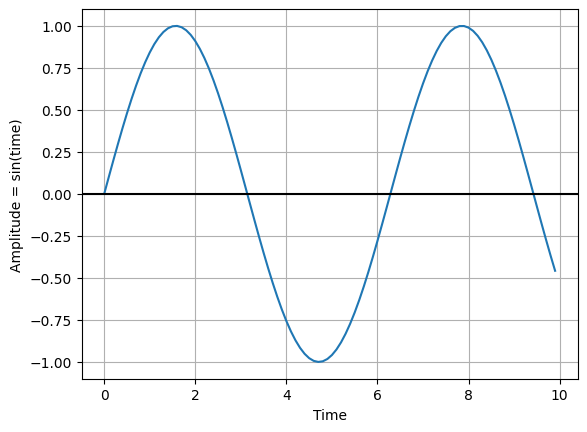

In [2]:
# Get x values of the sine wave

time = np.arange(0, 10, 0.1)
amplitude = np.sin(time)

plt.plot(time, amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

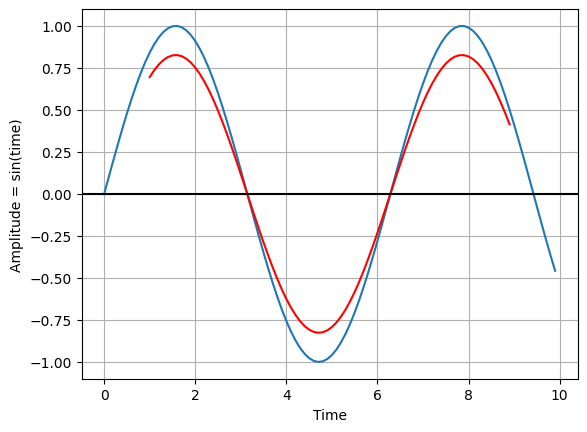

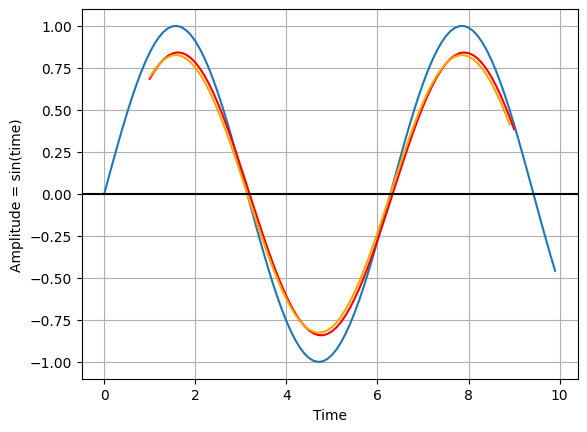

In [15]:
# Apply rolling mean in even window, with center True

df = pd.DataFrame({'data':amplitude})
window_size=20
moving_average1 = df.rolling(window=window_size, center=True).mean()

plt.plot(time, amplitude)
plt.plot(time, moving_average, color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

# Apply rolling mean in even window, with center True

df = pd.DataFrame({'data':amplitude})
window_size=21
moving_average2 = df.rolling(window=window_size, center=True).mean()

plt.plot(time, amplitude)
plt.plot(time, moving_average1, color='red')
plt.plot(time, moving_average2, color='orange')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

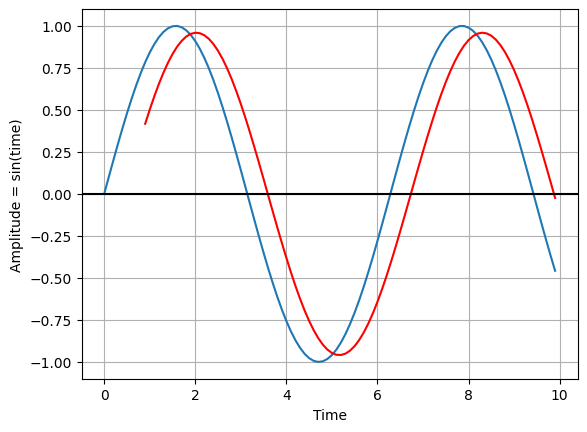

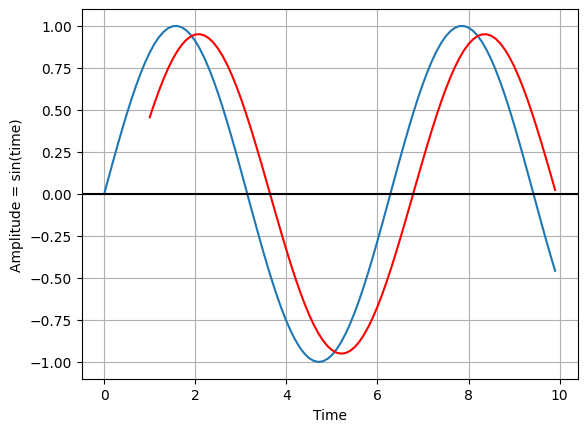

In [13]:
# Apply rolling mean in even window, with center False

df = pd.DataFrame({'data':amplitude})
window_size=10
moving_average = df.rolling(window=window_size, center=False).mean()

plt.plot(time, amplitude)
plt.plot(time, moving_average, color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

# Apply rolling mean in even window, with center False

df = pd.DataFrame({'data':amplitude})
window_size=11
moving_average = df.rolling(window=window_size, center=False).mean()

plt.plot(time, amplitude)
plt.plot(time, moving_average, color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()